# Part 1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8409 - loss: 0.5433 - val_accuracy: 0.9125 - val_loss: 0.3016
Epoch 2/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9117 - loss: 0.3121 - val_accuracy: 0.9179 - val_loss: 0.2918
Epoch 3/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9193 - loss: 0.2874 - val_accuracy: 0.9220 - val_loss: 0.2850
Epoch 4/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9183 - loss: 0.2901 - val_accuracy: 0.9221 - val_loss: 0.2820
Epoch 5/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9206 - loss: 0.2803 - val_accuracy: 0.9208 - val_loss: 0.2867
Epoch 6/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9239 - loss: 0.2755 - val_accuracy: 0.9242 - val_loss: 0.2802
Epoch 7/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9245 - loss: 0.2693 - val_accuracy: 0.9241 - val_loss: 0.2759
Epoch 8/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9238 - loss: 0.2693 - val_accuracy: 0.

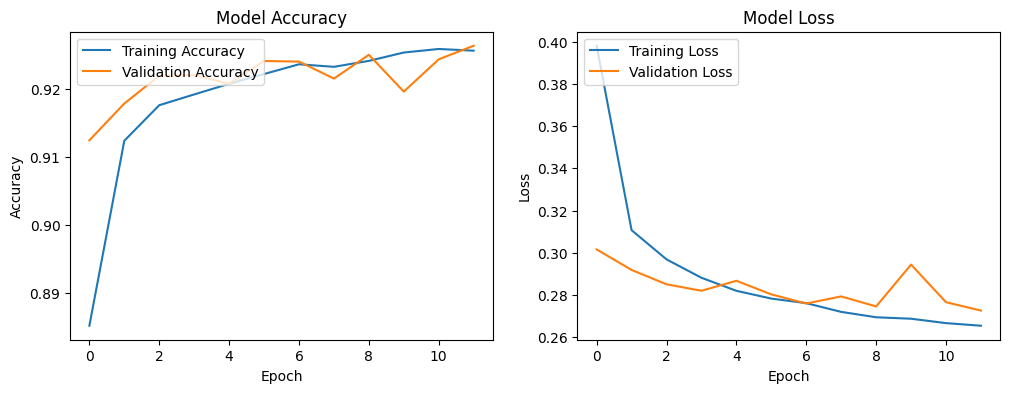

In [ ]:
import keras as keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.np_utils import to_categorical

# Load the MNIST dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = keras.datasets.mnist.load_data()

# Flatten the images to 1D arrays (28x28 -> 784)
x_train = x_train_original.reshape(60000, 784)
x_test = x_test_original.reshape(10000, 784)

# Rescale the data to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train_original, 10)
y_test = to_categorical(y_test_original, 10)

# Define the model: Multilayer Perceptron (MLP)
model_mlp = keras.Sequential()
model_mlp.add(keras.layers.Dense(256, input_shape=(784,)))  # Hidden layer with 256 units
model_mlp.add(keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes

# Summarize the model
model_mlp.summary()

# Compile the model with categorical crossentropy loss, RMSprop optimizer, and accuracy metric
model_mlp.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

# Train the model
history_mlp = model_mlp.fit(x_train, y_train,
                            batch_size=128,
                            epochs=12,
                            verbose=1,
                            validation_split=0.2)

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show the plots
    plt.show()

# Call the function to plot the training history
plot_training_history(history_mlp)


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model_mlp.evaluate(x_test, y_test, verbose=0)

# Print the results
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.28534820675849915
Test Accuracy: 0.9210000038146973


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8518 - loss: 0.5318 - val_accuracy: 0.9488 - val_loss: 0.1858
Epoch 2/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9532 - loss: 0.1640 - val_accuracy: 0.9594 - val_loss: 0.1407
Epoch 3/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9698 - loss: 0.1061 - val_accuracy: 0.9688 - val_loss: 0.1065
Epoch 4/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9782 - loss: 0.0754 - val_accuracy: 0.9727 - val_loss: 0.0987
Epoch 5/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9831 - loss: 0.0624 - val_accuracy: 0.9734 - val_loss: 0.0895
Epoch 6/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9876 - loss: 0.0449 - val_accuracy: 0.9753 - val_loss: 0.0825
Epoch 7/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9895 - loss: 0.0364 - val_accuracy: 0.9768 - val_loss: 0.0770
Epoch 8/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9921 - loss: 0.0279 - val_accuracy: 

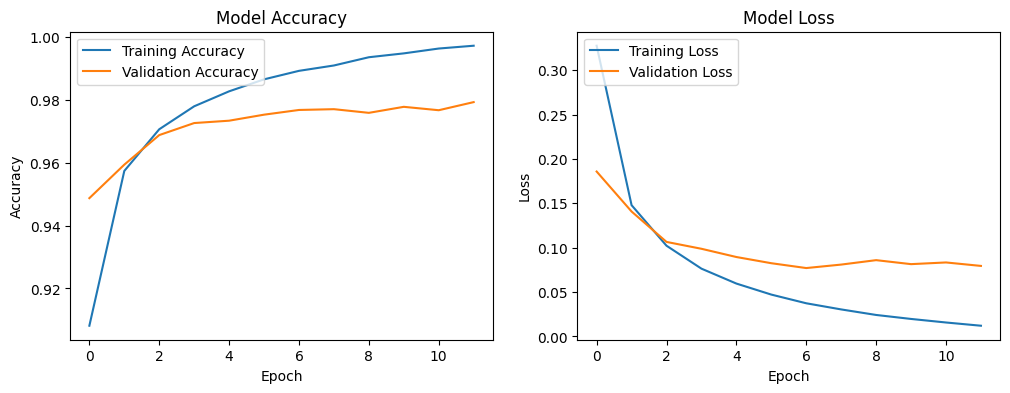

In [ ]:
# Define the model: Multilayer Perceptron (MLP) with ReLU activation
model_mlp_relu = keras.Sequential()
model_mlp_relu.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))  # Hidden layer with 256 units, ReLU activation
model_mlp_relu.add(keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes

# Summarize the model
model_mlp_relu.summary()

# Compile the model with categorical crossentropy loss, RMSprop optimizer, and accuracy metric
model_mlp_relu.compile(loss='categorical_crossentropy',
                       optimizer=keras.optimizers.RMSprop(),
                       metrics=['accuracy'])

# Train the model
history_mlp_relu = model_mlp_relu.fit(x_train, y_train,
                                      batch_size=128,
                                      epochs=12,
                                      verbose=1,
                                      validation_split=0.2)

# Plot training & validation accuracy and loss values
plot_training_history(history_mlp_relu)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 135s 352ms/step - accuracy: 0.8518 - loss: 0.4775 - val_accuracy: 0.9812 - val_loss: 0.0656
Epoch 2/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 132s 351ms/step - accuracy: 0.9826 - loss: 0.0561 - val_accuracy: 0.9867 - val_loss: 0.0478
Epoch 3/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 343ms/step - accuracy: 0.9903 - loss: 0.0315 - val_accuracy: 0.9871 - val_loss: 0.0472
Epoch 4/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 347ms/step - accuracy: 0.9936 - loss: 0.0208 - val_accuracy: 0.9872 - val_loss: 0.0463
Epoch 5/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 352ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 6/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 138s 341ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9890 - val_loss: 0.0473


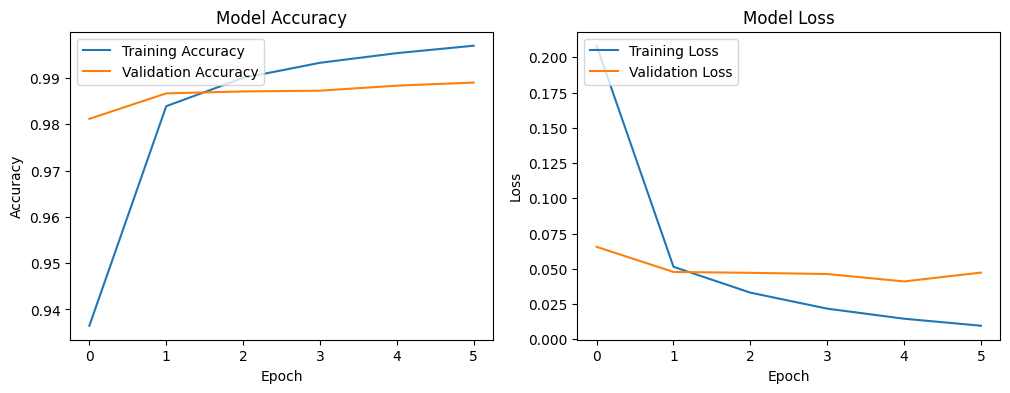

In [ ]:
import keras as keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.np_utils import to_categorical

# Load the MNIST dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = keras.datasets.mnist.load_data()

# Reshape the data to include the channel dimension for convolutional layers (28x28x1)
x_train = x_train_original.reshape(60000, 28, 28, 1)
x_test = x_test_original.reshape(10000, 28, 28, 1)

# Rescale the data to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train_original, 10)
y_test = to_categorical(y_test_original, 10)

# Define the convolutional model: 2 Conv layers + 1 Dense layer
model_cnn = keras.Sequential()

# First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
model_cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer: 64 filters, 3x3 kernel, ReLU activation
model_cnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# MaxPooling layer: pool size 2x2
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model_cnn.add(keras.layers.Flatten())

# Fully connected layer with 128 units, ReLU activation
model_cnn.add(keras.layers.Dense(128, activation='relu'))

# Output layer with 10 units (for 10 classes), softmax activation
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

# Summarize the model
model_cnn.summary()

# Compile the model with Adadelta optimizer and categorical crossentropy loss
model_cnn.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adadelta(learning_rate=1.0),
                  metrics=['accuracy'])

# Train the model for 6 epochs
history_cnn = model_cnn.fit(x_train, y_train,
                            batch_size=128,
                            epochs=6,
                            verbose=1,
                            validation_split=0.2)

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show the plots
    plt.show()

# Call the function to plot the training history
plot_training_history(history_cnn)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 149s 390ms/step - accuracy: 0.8018 - loss: 0.6024 - val_accuracy: 0.9788 - val_loss: 0.0713
Epoch 2/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 370ms/step - accuracy: 0.9687 - loss: 0.1024 - val_accuracy: 0.9853 - val_loss: 0.0505
Epoch 3/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 374ms/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9869 - val_loss: 0.0456
Epoch 4/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 136s 359ms/step - accuracy: 0.9831 - loss: 0.0576 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 5/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 146s 369ms/step - accuracy: 0.9853 - loss: 0.0491 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 6/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 357ms/step - accuracy: 0.9858 - loss: 0.0453 - val_accuracy: 0.9894 - val_loss: 0.0383


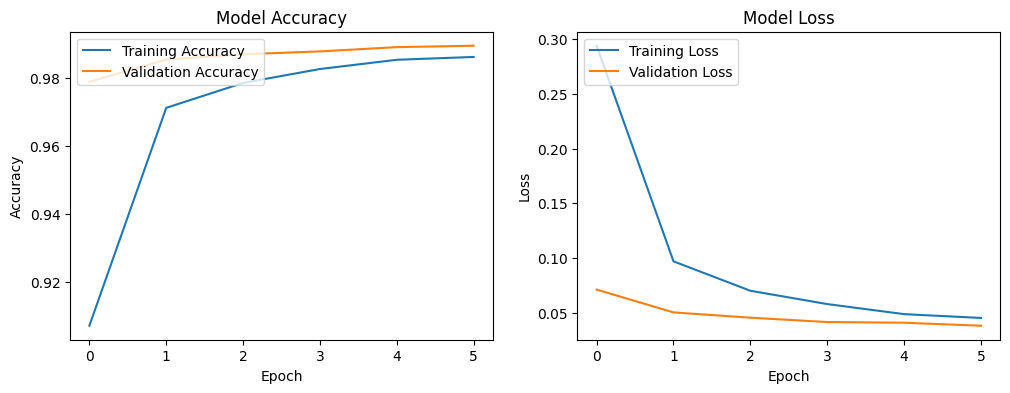

In [ ]:
import keras as keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.np_utils import to_categorical

# Load the MNIST dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = keras.datasets.mnist.load_data()

# Reshape the data to include the channel dimension for convolutional layers (28x28x1)
x_train = x_train_original.reshape(60000, 28, 28, 1)
x_test = x_test_original.reshape(10000, 28, 28, 1)

# Rescale the data to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train_original, 10)
y_test = to_categorical(y_test_original, 10)

# Define the convolutional model with dropout
model_cnn_dropout = keras.Sequential()

# First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
model_cnn_dropout.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer: 64 filters, 3x3 kernel, ReLU activation
model_cnn_dropout.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# MaxPooling layer: pool size 2x2
model_cnn_dropout.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Add dropout layer after MaxPooling (Dropout rate = 0.25)
model_cnn_dropout.add(keras.layers.Dropout(rate=0.25))

# Flatten the output from the convolutional layers
model_cnn_dropout.add(keras.layers.Flatten())

# Fully connected layer with 128 units, ReLU activation
model_cnn_dropout.add(keras.layers.Dense(128, activation='relu'))

# Add dropout layer after the Dense layer (Dropout rate = 0.5)
model_cnn_dropout.add(keras.layers.Dropout(rate=0.5))

# Output layer with 10 units (for 10 classes), softmax activation
model_cnn_dropout.add(keras.layers.Dense(10, activation='softmax'))

# Summarize the model
model_cnn_dropout.summary()

# Compile the model with Adadelta optimizer and categorical crossentropy loss
model_cnn_dropout.compile(loss='categorical_crossentropy',
                          optimizer=keras.optimizers.Adadelta(learning_rate=1.0),
                          metrics=['accuracy'])

# Train the model for 6 epochs
history_cnn_dropout = model_cnn_dropout.fit(x_train, y_train,
                                            batch_size=128,
                                            epochs=6,
                                            verbose=1,
                                            validation_split=0.2)

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show the plots
    plt.show()

# Call the function to plot the training history
plot_training_history(history_cnn_dropout)


# Part 2

In [4]:
import numpy as np
import keras

(x_train_original, y_train_original), (x_test_original, y_test_original) = keras.datasets.mnist.load_data()
example_image = x_train_original[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
def convolve(input_image, filters):
    H_in, W_in, C_in = input_image.shape     #H_in: height of the input image, W_in: width of the input image, C_in: number of channels in the input image
    N_F, F_h, F_w, C_in_f = filters.shape    #N_F: Number of filters, F_h: height of each filter, F_w: width of each filter, C_in_f: number of channels in each filter
    assert C_in == C_in_f, "Channel dimensions of input and filters must match."

    H_out = H_in - F_h + 1
    W_out = W_in - F_w + 1
    output = np.zeros((H_out, W_out, N_F))

    for n in range(N_F):
        current_filter = filters[n]  # Shape: (F_h, F_w, C_in)
        for i in range(H_out):
            for j in range(W_out):
                patch = input_image[i:i+F_h, j:j+F_w, :]  # Shape: (F_h, F_w, C_in)
                conv_result = np.sum(patch * current_filter)
                output[i, j, n] = conv_result
    return output

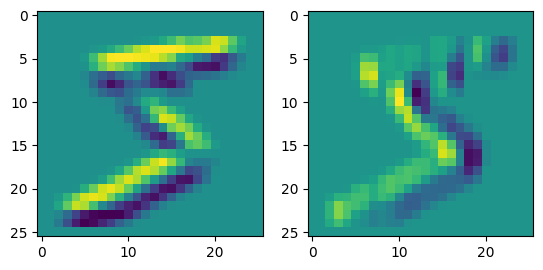

In [7]:
import matplotlib.pyplot as plt

# 3x3 filters for horizontal and vertical edge detection
horizontal_filter = np.array([
    [[-1], [-1], [-1]],
    [[ 0], [ 0], [ 0]],
    [[ 1], [ 1], [ 1]]
])
vertical_filter = np.array([
    [[-1], [ 0], [ 1]],
    [[-1], [ 0], [ 1]],
    [[-1], [ 0], [ 1]]
])

# Stack filters into a single array
filters = np.array([horizontal_filter, vertical_filter])  # Shape: (2, 3, 3, 1)

# Reshaping the eaxmple image
example_image = example_image.reshape(28, 28, 1)  # Shape: (28, 28, 1)

# Performing Convolution
convolved_images = convolve(example_image, filters)  # Shape: (26, 26, 2)

# Extracting horizontal and vertical features
horizontal_feature = convolved_images[:, :, 0]
vertical_feature = convolved_images[:, :, 1]

#Show the images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(horizontal_feature)
ax2.imshow(vertical_feature)

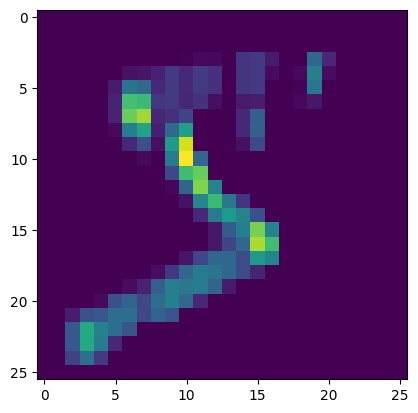

In [8]:
#Applying ReLU and Visualizing, the ReLU function is applied to remove negative values from a feature map and then visualizing the result as an image
def relu(feature_map):
    activated_map = np.maximum(feature_map, 0)
    return activated_map

relu_vertical_feature = relu(vertical_feature)
plt.imshow(relu_vertical_feature)

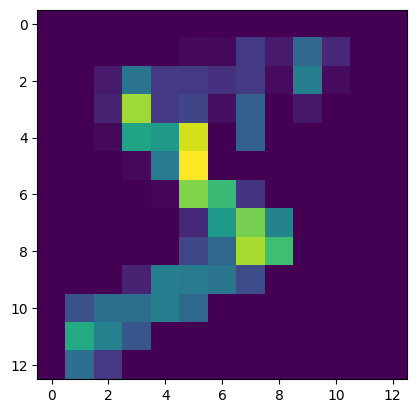

In [9]:
def max_pooling(feature_map, pool_size):
# Extract dimensions:
    H_in, W_in = feature_map.shape
    pool_height, pool_width = pool_size
    H_out = int(H_in / pool_height)
    W_out = int(W_in / pool_width)

# Create an empty pooled map:
    pooled_map = np.zeros((H_out, W_out))

# Iterate through the feature map:
    for i in range(H_out):
        for j in range(W_out):
            h_start = i * pool_height
            h_end = h_start + pool_height
            w_start = j * pool_width
            w_end = w_start + pool_width
            patch = feature_map[h_start:h_end, w_start:w_end]
            pooled_map[i, j] = np.max(patch)
    return pooled_map

pooled_vertical_feature = max_pooling(relu_vertical_feature, (2, 2))
plt.imshow(pooled_vertical_feature)

77.05325443786982 150.32010264312424
2.6277468038465242e-17 0.9999999999999998


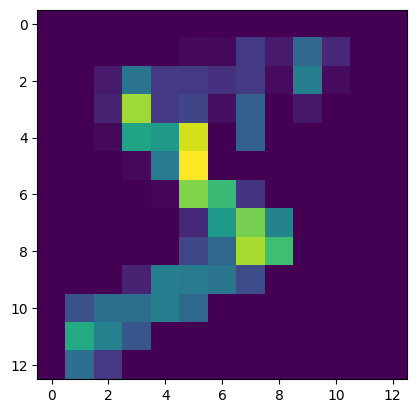

In [11]:
def normalize(feature_map):
    mean = np.mean(feature_map)
    std = np.std(feature_map)
    normalized_map = (feature_map - mean) / std
    print(mean, std)
    return normalized_map

normalized_vertical_feature = normalize(pooled_vertical_feature)
print(np.mean(normalized_vertical_feature), np.std(normalized_vertical_feature))
plt.imshow(normalized_vertical_feature)

In [15]:
def fully_connected(image_input, weights):
    flat_input = image_input.reshape(-1)
    output = flat_input @ weights  # Equivalent to np.dot(flat_input, weights)
    return output

# Initialize random weights
input_size = len(normalized_vertical_feature)**2
print(input_size)
output_size = 10  # For example, 10 classes in MNIST
weights = np.random.rand(input_size, output_size)

# Compute Fully-Connected Layer Output
fc_output = fully_connected(normalized_vertical_feature, weights)

print("Fully-Connected Layer Output:\n", fc_output)

169
Fully-Connected Layer Output:
 [-0.10946854  6.11711823  3.91658063 -2.51936716  4.08711719 -0.46058136
  3.47346013 -2.90763217  1.76279823 -3.97306308]


In [ ]:
def softmax(activations):
    exp_activations = np.exp(activations)
    sum_exp_activations = np.sum(exp_activations)
    probabilities = exp_activations / sum_exp_activations
    return probabilities

# Apply Softmax to the output of the fully-connected layer
probabilities = softmax(fc_output)

print("Probabilities after Softmax:\n", probabilities)

Probabilities after Softmax:
 [3.06963963e-02 4.42593028e-03 5.92804568e-03 6.30330688e-02
 2.94742490e-02 8.25131016e-01 1.55401186e-02 2.50713564e-03
 5.93703587e-04 2.26703364e-02]
